<a href="https://colab.research.google.com/github/Sumanta1706/Classification-regression/blob/main/Collison_physics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
# Import required libraries 
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA

**Importing the dataset**

In [ ]:
data_all = pd.read_excel("Data_0.xlsx")
data_all

,node,mag_u,u1,u2,u3,longitude,latitude,impact_velocity,impact_duration,x,y,z,x_new,y_new,z_new,Comments
0,1,0.001281,-0.001176,0.000000,-0.000507,22.5,22.5,2.5,0.01,0.000000,0.000000,-1.500000,-0.001176,-0.000309,-1.499950,22d5-22d5-2d5-A1
1,2,0.000425,-0.000309,0.000244,-0.000162,22.5,22.5,2.5,0.01,0.000000,1.500000,-1.496790,-0.000170,1.497300,-1.496740,22d5-22d5-2d5-A1
2,3,0.000054,0.000049,0.000000,-0.000024,22.5,22.5,2.5,0.01,-1.487170,-1.471180,-1.448890,-1.487110,-1.471130,-1.448840,22d5-22d5-2d5-A1
3,4,0.000193,-0.000170,0.000000,0.000092,22.5,22.5,2.5,0.01,-1.420400,-1.385820,-1.345310,-1.420350,-1.385780,-1.345270,22d5-22d5-2d5-A1
4,5,0.004768,-0.002696,0.000000,-0.003933,22.5,22.5,2.5,0.01,-1.299040,-1.247200,-1.190030,-1.299010,-1.247200,-1.190030,22d5-22d5-2d5-A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277207,1773,0.005099,0.004209,-0.002571,0.001295,90.0,90.0,10.0,0.02,0.331896,0.249859,0.167083,0.332727,0.250529,0.167560,90-90-10-A3
277208,1774,0.005343,0.004506,-0.002644,0.001120,90.0,90.0,10.0,0.02,0.083755,0.830911,0.772880,0.084016,0.832748,0.774682,90-90-10-A3
277209,1775,0.005569,0.004762,-0.002744,0.000902,90.0,90.0,10.0,0.02,0.707314,0.636606,0.562408,0.709056,0.638264,0.563966,90-90-10-A3
277210,1776,0.005743,0.004955,-0.002832,0.000638,90.0,90.0,10.0,0.02,0.485747,0.407267,0.327422,0.487185,0.408562,0.328541,90-90-10-A3


*Creating the Numbers column*

In [ ]:
Numbers = np.concatenate([([i]*1777) for i in list(range(1,157))], axis=0)
Numbers

array([  1,   1,   1, ..., 156, 156, 156])

*adding the number column to the dataframe*


In [ ]:
data_all['Numbers'] = Numbers.tolist()
data_all.head()

,node,mag_u,u1,u2,u3,longitude,latitude,impact_velocity,impact_duration,x,y,z,x_new,y_new,z_new,Comments,Numbers
0,1,0.001281,-0.001176,0.000000,-0.000507,22.5,22.5,2.5,0.01,0.00000,0.00000,-1.50000,-0.001176,-0.000309,-1.49995,22d5-22d5-2d5-A1,1
1,2,0.000425,-0.000309,0.000244,-0.000162,22.5,22.5,2.5,0.01,0.00000,1.50000,-1.49679,-0.000170,1.497300,-1.49674,22d5-22d5-2d5-A1,1
2,3,0.000054,0.000049,0.000000,-0.000024,22.5,22.5,2.5,0.01,-1.48717,-1.47118,-1.44889,-1.487110,-1.471130,-1.44884,22d5-22d5-2d5-A1,1
3,4,0.000193,-0.000170,0.000000,0.000092,22.5,22.5,2.5,0.01,-1.42040,-1.38582,-1.34531,-1.420350,-1.385780,-1.34527,22d5-22d5-2d5-A1,1
4,5,0.004768,-0.002696,0.000000,-0.003933,22.5,22.5,2.5,0.01,-1.29904,-1.24720,-1.19003,-1.299010,-1.247200,-1.19003,22d5-22d5-2d5-A1,1


In [ ]:
first_column = data_all.pop('Numbers')
data_all.insert(0, 'Numbers', first_column)
data_all

,Numbers,node,mag_u,u1,u2,u3,longitude,latitude,impact_velocity,impact_duration,x,y,z,x_new,y_new,z_new,Comments
0,1,1,0.001281,-0.001176,0.000000,-0.000507,22.5,22.5,2.5,0.01,0.000000,0.000000,-1.500000,-0.001176,-0.000309,-1.499950,22d5-22d5-2d5-A1
1,1,2,0.000425,-0.000309,0.000244,-0.000162,22.5,22.5,2.5,0.01,0.000000,1.500000,-1.496790,-0.000170,1.497300,-1.496740,22d5-22d5-2d5-A1
2,1,3,0.000054,0.000049,0.000000,-0.000024,22.5,22.5,2.5,0.01,-1.487170,-1.471180,-1.448890,-1.487110,-1.471130,-1.448840,22d5-22d5-2d5-A1
3,1,4,0.000193,-0.000170,0.000000,0.000092,22.5,22.5,2.5,0.01,-1.420400,-1.385820,-1.345310,-1.420350,-1.385780,-1.345270,22d5-22d5-2d5-A1
4,1,5,0.004768,-0.002696,0.000000,-0.003933,22.5,22.5,2.5,0.01,-1.299040,-1.247200,-1.190030,-1.299010,-1.247200,-1.190030,22d5-22d5-2d5-A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277207,156,1773,0.005099,0.004209,-0.002571,0.001295,90.0,90.0,10.0,0.02,0.331896,0.249859,0.167083,0.332727,0.250529,0.167560,90-90-10-A3
277208,156,1774,0.005343,0.004506,-0.002644,0.001120,90.0,90.0,10.0,0.02,0.083755,0.830911,0.772880,0.084016,0.832748,0.774682,90-90-10-A3
277209,156,1775,0.005569,0.004762,-0.002744,0.000902,90.0,90.0,10.0,0.02,0.707314,0.636606,0.562408,0.709056,0.638264,0.563966,90-90-10-A3
277210,156,1776,0.005743,0.004955,-0.002832,0.000638,90.0,90.0,10.0,0.02,0.485747,0.407267,0.327422,0.487185,0.408562,0.328541,90-90-10-A3


**Creating x & y values for longitude data**

In [ ]:
# x - input(Features): "node", "mag_u", "u1", "u2", "u3", "latitude", "impact_velocity", "impact_duration", "x", "y", "z", "x_new", "y_new", "z_new"
# y - output(Label): longitude
x_long = data_all.copy()

In [ ]:
x_long.drop(['latitude', 'impact_velocity', 'impact_duration', 'longitude', 'Comments'], axis=1, inplace=True)
x_long

,Numbers,node,mag_u,u1,u2,u3,x,y,z,x_new,y_new,z_new
0,1,1,0.001281,-0.001176,0.000000,-0.000507,0.000000,0.000000,-1.500000,-0.001176,-0.000309,-1.499950
1,1,2,0.000425,-0.000309,0.000244,-0.000162,0.000000,1.500000,-1.496790,-0.000170,1.497300,-1.496740
2,1,3,0.000054,0.000049,0.000000,-0.000024,-1.487170,-1.471180,-1.448890,-1.487110,-1.471130,-1.448840
3,1,4,0.000193,-0.000170,0.000000,0.000092,-1.420400,-1.385820,-1.345310,-1.420350,-1.385780,-1.345270
4,1,5,0.004768,-0.002696,0.000000,-0.003933,-1.299040,-1.247200,-1.190030,-1.299010,-1.247200,-1.190030
...,...,...,...,...,...,...,...,...,...,...,...,...
277207,156,1773,0.005099,0.004209,-0.002571,0.001295,0.331896,0.249859,0.167083,0.332727,0.250529,0.167560
277208,156,1774,0.005343,0.004506,-0.002644,0.001120,0.083755,0.830911,0.772880,0.084016,0.832748,0.774682
277209,156,1775,0.005569,0.004762,-0.002744,0.000902,0.707314,0.636606,0.562408,0.709056,0.638264,0.563966
277210,156,1776,0.005743,0.004955,-0.002832,0.000638,0.485747,0.407267,0.327422,0.487185,0.408562,0.328541


In [ ]:
x_long = x_long.pivot(index = 'Numbers', columns = 'node', 
               values = ['mag_u', 'u1', 'u2', 'u3', 'x', 'y', 'z', 'x_new', 'y_new', 'z_new'])
x_long.shape

(156, 17770)

In [18]:
y_long = data_all[['Numbers', "longitude"]]
y_long = y_long.drop_duplicates(subset = 'Numbers')
y_long = y_long[['longitude']]

In [19]:
y_long

,longitude
0,22.5
1777,22.5
3554,22.5
5331,22.5
7108,22.5
...,...
268327,90.0
270104,90.0
271881,90.0
273658,90.0


**Building the model for keras regressor**


In [21]:
# Build our train and test sets
# 80% training data, 20% test data
x_train, x_test, y_train, y_test = train_test_split(x_long, y_long, test_size=0.2, random_state=42)

In [32]:
# Build a neural network
tf.random.set_seed(42)

# 1.Create a model (Activation function=Relu, Dropout rate=0.15/ 0.10)
model_long = tf.keras.Sequential([
                  tf.keras.layers.Dense(14, activation='relu', name="input_layer"), 
                  tf.keras.layers.Dense(128, activation='relu', name="hidden_layer1"),
                  tf.keras.layers.Dropout(0.1),
                  tf.keras.layers.Dense(8, activation='relu', name="hidden_layer2"),
                  tf.keras.layers.Dropout(0.15),
                  tf.keras.layers.Dense(1, name="output_layer"),
              
])

# 2.Compile the model 
model_long.compile(loss = tf.keras.losses.mse,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0025, beta_1=0.9, beta_2=0.99),
                        metrics = ["mse"])

# 3.Fit the model
history = model_long.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 11ms/step - loss: 1987.7151 - mse: 1987.7151
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 952.8118 - mse: 952.8118
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 757.0525 - mse: 757.0525
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 991.6989 - mse: 991.6989
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 773.6309 - mse: 773.6309
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 732.4548 - mse: 732.4548
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 603.0793 - mse: 603.0793
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 623.6869 - mse: 623.6869
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 561.8392 - mse: 561.8392
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 580.9730 - mse: 580.9730
Epoch 11/100
4/4 [=========

In [33]:
model_long.evaluate(x_test,y_test)

1/1 [==============================] - 0s 120ms/step - loss: 61.1477 - mse: 61.1477


[61.1477165222168, 61.1477165222168]

In [34]:
pred_long = model_long.predict(x_test)
pred_long

array([[54.783134],
       [43.104095],
       [42.81079 ],
       [47.02138 ],
       [69.00924 ],
       [29.440956],
       [43.9125  ],
       [56.322075],
       [42.730186],
       [70.750465],
       [22.00888 ],
       [46.540916],
       [31.25056 ],
       [61.809418],
       [39.427116],
       [21.753614],
       [75.21646 ],
       [60.90316 ],
       [79.666374],
       [45.886665],
       [55.4795  ],
       [22.654   ],
       [40.13287 ],
       [19.359688],
       [22.097088],
       [66.12021 ],
       [45.222153],
       [45.807774],
       [48.253365],
       [56.342293],
       [18.575253],
       [70.96317 ]], dtype=float32)

*Comparison of our models*

In [35]:
result_long = pd.DataFrame(pred_long)
result_long['actual'] = y_test.values
result_long.columns = ['Predicted', 'Actual']
result_long

,Predicted,Actual
0,54.783134,67.5
1,43.104095,45.0
2,42.810791,45.0
3,47.021381,45.0
4,69.009239,67.5
5,29.440956,22.5
6,43.912498,45.0
7,56.322075,67.5
8,42.730186,45.0
9,70.750465,67.5


In [36]:
import sklearn
sklearn.metrics.r2_score(y_test, pred_long)

0.8594494777319786

In [37]:
#Plotting our predicted and actual Values
# data to plot
#figure(figsize=(10, 6), dpi=80)
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (20,10)

# creating plot
#fig, ax = plt.subplots()
#bar_width = 0.80
#X = np.arange(10)

#p1 = plt.bar(X, result['Actual'], bar_width, color='xkcd:sky blue', label='Actual')

# The bar of second plot starts where the first bar ends
#p2 = plt.bar(X + bar_width, result['Predicted'][:50], bar_width,
#color='m',
#label='Predicted')

#plt.ylabel('Longitude')
#plt.title('Actual Vs Predicted')
#plt.legend()

#plt.tight_layout()
#plt.show()

Text(0.5, 0, 'epochs')

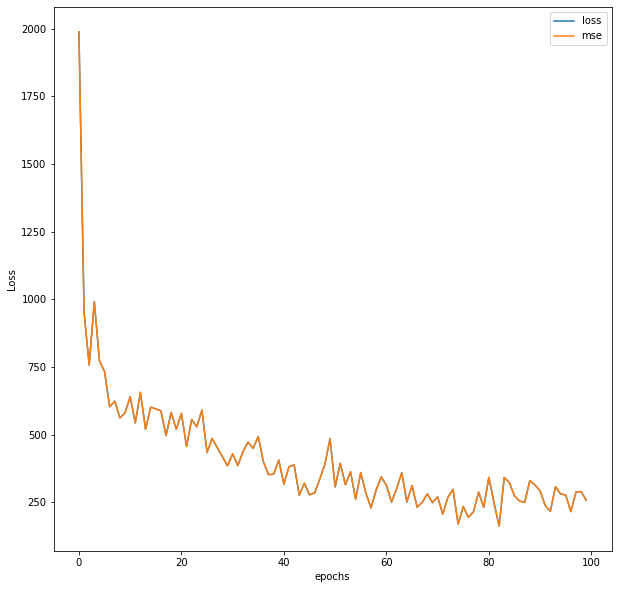

In [38]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.ylabel("Loss")
plt.xlabel("epochs")

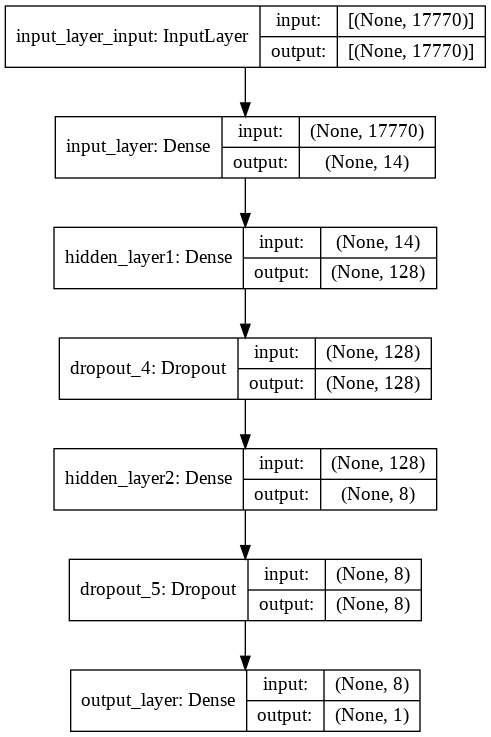

In [39]:
tf.keras.utils.plot_model(model_long, to_file="my_model.png", show_shapes=True)

In [40]:
model_long.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 14)                248794    
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               1920      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 8)                 1032      
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 251,755
Trainable params: 251,755
Non-trainable params: 0
________________________________________________

In [41]:
model_long.save("longitude")

INFO:tensorflow:Assets written to: longitude/assets


**Creating x & y values for latitude data**

In [42]:
x_lat = data_all.copy()
x_lat.drop(['latitude', 'impact_velocity', 'impact_duration', 'longitude', 'Comments'], axis=1, inplace=True)
x_lat

,Numbers,node,mag_u,u1,u2,u3,x,y,z,x_new,y_new,z_new
0,1,1,0.001281,-0.001176,0.000000,-0.000507,0.000000,0.000000,-1.500000,-0.001176,-0.000309,-1.499950
1,1,2,0.000425,-0.000309,0.000244,-0.000162,0.000000,1.500000,-1.496790,-0.000170,1.497300,-1.496740
2,1,3,0.000054,0.000049,0.000000,-0.000024,-1.487170,-1.471180,-1.448890,-1.487110,-1.471130,-1.448840
3,1,4,0.000193,-0.000170,0.000000,0.000092,-1.420400,-1.385820,-1.345310,-1.420350,-1.385780,-1.345270
4,1,5,0.004768,-0.002696,0.000000,-0.003933,-1.299040,-1.247200,-1.190030,-1.299010,-1.247200,-1.190030
...,...,...,...,...,...,...,...,...,...,...,...,...
277207,156,1773,0.005099,0.004209,-0.002571,0.001295,0.331896,0.249859,0.167083,0.332727,0.250529,0.167560
277208,156,1774,0.005343,0.004506,-0.002644,0.001120,0.083755,0.830911,0.772880,0.084016,0.832748,0.774682
277209,156,1775,0.005569,0.004762,-0.002744,0.000902,0.707314,0.636606,0.562408,0.709056,0.638264,0.563966
277210,156,1776,0.005743,0.004955,-0.002832,0.000638,0.485747,0.407267,0.327422,0.487185,0.408562,0.328541


In [43]:
x_lat = x_lat.pivot(index = 'Numbers', columns = 'node', 
               values = ['mag_u', 'u1', 'u2', 'u3', 'x', 'y', 'z', 'x_new', 'y_new', 'z_new'])
x_lat.shape

(156, 17770)

In [44]:
y_lat = data_all[['Numbers', "longitude"]]
y_lat = y_lat.drop_duplicates(subset = 'Numbers')
y_lat = y_lat[['longitude']]

**Building the Keras regressor model**

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_long, y_lat, test_size=0.2, random_state=42)

In [46]:
# Build a neural network
tf.random.set_seed(42)

# 1.Create a model (Activation function=Relu, Dropout rate=0.15/ 0.10)
model_lat = tf.keras.Sequential([
                  tf.keras.layers.Dense(14, activation='relu', name="input_layer"), 
                  tf.keras.layers.Dense(128, activation='relu', name="hidden_layer1"),
                  tf.keras.layers.Dropout(0.1),
                  tf.keras.layers.Dense(8, activation='relu', name="hidden_layer2"),
                  tf.keras.layers.Dropout(0.15),
                  tf.keras.layers.Dense(1, name="output_layer"),
              
])

# 2.Compile the model 
model_lat.compile(loss = tf.keras.losses.mse,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0025, beta_1=0.9, beta_2=0.99),
                        metrics = ["mse"])

# 3.Fit the model
history = model_lat.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 12ms/step - loss: 1987.7151 - mse: 1987.7151
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 952.8118 - mse: 952.8118
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 757.0525 - mse: 757.0525
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 991.6989 - mse: 991.6989
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 773.6309 - mse: 773.6309
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 732.4548 - mse: 732.4548
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 603.0793 - mse: 603.0793
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 623.6869 - mse: 623.6869
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 561.8392 - mse: 561.8392
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 580.9730 - mse: 580.9730
Epoch 11/100
4/4 [=========

In [47]:
model_lat.evaluate(x_test,y_test)

1/1 [==============================] - 0s 118ms/step - loss: 61.1477 - mse: 61.1477


[61.1477165222168, 61.1477165222168]

In [48]:
pred_lat = model_lat.predict(x_test)
pred_lat

array([[54.783134],
       [43.104095],
       [42.81079 ],
       [47.02138 ],
       [69.00924 ],
       [29.440956],
       [43.9125  ],
       [56.322075],
       [42.730186],
       [70.750465],
       [22.00888 ],
       [46.540916],
       [31.25056 ],
       [61.809418],
       [39.427116],
       [21.753614],
       [75.21646 ],
       [60.90316 ],
       [79.666374],
       [45.886665],
       [55.4795  ],
       [22.654   ],
       [40.13287 ],
       [19.359688],
       [22.097088],
       [66.12021 ],
       [45.222153],
       [45.807774],
       [48.253365],
       [56.342293],
       [18.575253],
       [70.96317 ]], dtype=float32)

In [49]:
result_lat = pd.DataFrame(pred_lat)
result_lat['actual'] = y_test.values
result_lat.columns = ['Predicted', 'Actual']
result_lat

,Predicted,Actual
0,54.783134,67.5
1,43.104095,45.0
2,42.810791,45.0
3,47.021381,45.0
4,69.009239,67.5
5,29.440956,22.5
6,43.912498,45.0
7,56.322075,67.5
8,42.730186,45.0
9,70.750465,67.5


R2 value

In [50]:
import sklearn
sklearn.metrics.r2_score(y_test, pred_lat)

0.8594494777319786

In [51]:
#Plotting our predicted and actual Values
# data to plot
#figure(figsize=(10, 6), dpi=80)
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (20,10)

# creating plot
#fig, ax = plt.subplots()
#bar_width = 0.80
#X = np.arange(10)

#p1 = plt.bar(X, result_2['Actual'], bar_width, color='xkcd:sky blue', label='Actual')

# The bar of second plot starts where the first bar ends
#p2 = plt.bar(X + bar_width, result_2['Predicted'][:50], bar_width,
#color='m',
#label='Predicted')

#plt.ylabel('Longitude')
#plt.title('Actual Vs Predicted')
#plt.legend()

#plt.tight_layout()
#plt.show()

Text(0.5, 0, 'epochs')

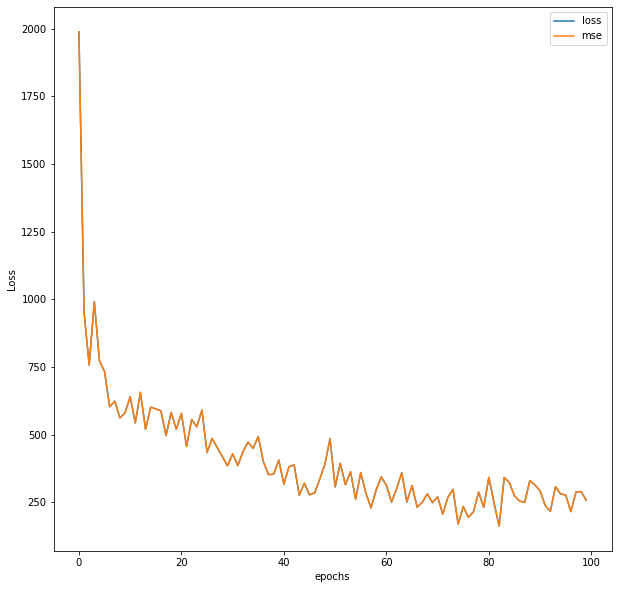

In [52]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.ylabel("Loss")
plt.xlabel("epochs")

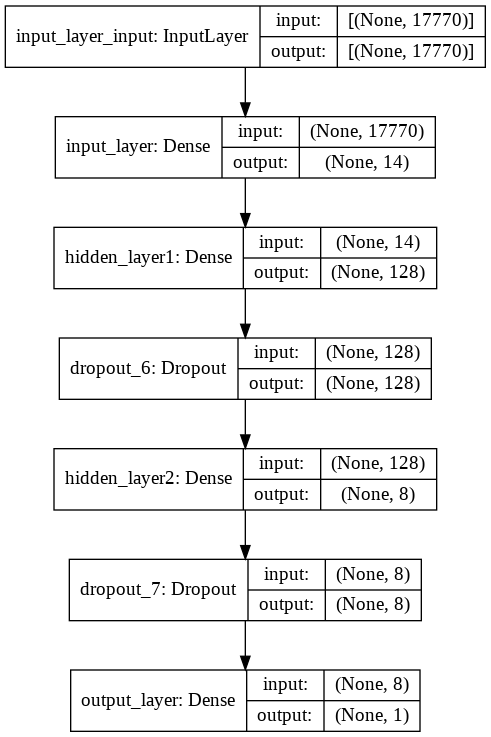

In [53]:
tf.keras.utils.plot_model(model_lat, to_file="my_model.png", show_shapes=True)

In [54]:
model_lat.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 14)                248794    
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               1920      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 8)                 1032      
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 251,755
Trainable params: 251,755
Non-trainable params: 0
________________________________________________